# Практическая работа №3: Статистический анализ социальных сетей
Выполнил студент гр. 0383 Желнин Максим. Вариант №54

## Цель работы
Овладеть навыками работы с математическими пакетами для статистического анализа социальных сетей.

## Основные теоретические положения
**Диада** $-$ элемент сети, представляющий собой пару акторов и связь между ними, либо её отсутствие 

$D_{ij}=(X_{ij}, X_{ji}), i\neq j$.

**Цензус диад** — тройка чисел <M, A, N>, где:

$M = \sum_{i<j} X_{ij} X_{ji}$

$A = X_{++} - 2M$

$N = (^2_g) - A - M$

**Индекс взаимности Каца-Пауэлла** — хар-ка измерения тенденции акторов в группе:

$-\infty < \rho_{кр} \leqslant 1$.

Индекс взаимности основан на ожидании кол-ва взаимн. диад, предполагая, что выбор делается акторами случайным образом.

Вероятность взаимного выбора между любой произвольной парой акторов равна $d^2/(g-1)^2$

Вероятность того, что общая диада является взаимной:

$p(i -> j ∩ j -> i) = \frac{d}{(g-1)}(\frac{d}{(g-1)} + p_{kp}\frac{g-1-d}{g-1})$

Оценка при свободном выборе $p_{ekp}$ = $\frac{2(g-1)M - gd^2}{gd(g-1-d)}$

Оценка при фиксированном выборе 

$p_{ekpfix} = \frac{2(g-1)^2M-L^2+L_2}{L(g-1)^2 -L^2 +L_2}$

**Индекс взаимности Бандиопадхьяйя** — индекс, основанный на максимальной и минимальной значениях количества диад в сети. 

$\rho_B = \displaystyle{\frac{M - M_{\min}}{M_{\max} - M_{\min}}}.$

$M_{\min} = \max f(t)$, $0\leqslant t \leqslant g$

**Нулевые гипотезы**

$H_0: L \sim B(g(g-1), \frac{1}{2})$

$z_l = \frac{l - g(g-1)/2}{\sqrt{g(g-1)/4}}$ 

$H_0 : L \sim B(g(g-1), P_0)$

$z_l = \frac{l - g(g-1)P_0}{\sqrt{g(g-1)P_0(1-P_0)}}$

## Постановка задачи
С помощью математических пакетов и соответствующих библиотек провести статистический анализ случайно смоделированного ориентированного графа. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

In [5]:
if(!require('igraph')) {
        install.packages('igraph')
        library('igraph')
        
    }
if(!require('statnet')){
        install.packages('statnet')
        library('statnet')
}

1)  С помощью библиотеки igraph смоделировать случайный орграф
G𝑑 на основе модели Эрдеша—Реньи: G𝑑 = G (𝑔, 𝑝), где 𝑔 – количество акторов, 𝑝 – вероятность появления дуги между акторами. В R
для модели случайного графа Эрдеша—Реньи существует функция
erdos.renyi.game(). Ознакомьтесь с данной моделью и опишите
её.
Согласно варианту 54: p = 0.63, g = 95

In [6]:
g <- 95
p <- 0.63
random_graph <- erdos.renyi.game(g, p, "gnp", directed = T)
net <- network(as_adjacency_matrix(random_graph), directed = T)

<sparse>[ <logic> ]: .M.sub.i.logical() maybe inefficient



Используем вариант с G(g, p). В данном случае между вершинами будут случайно расставляться рёбра с вероятностью $p$. Вероятность построить граф с $g$ узлами и $L$ рёбрами равна:

$p^L (1-p)^{(^2_n) - L}$.


2)  Отобразить полученный орграф.

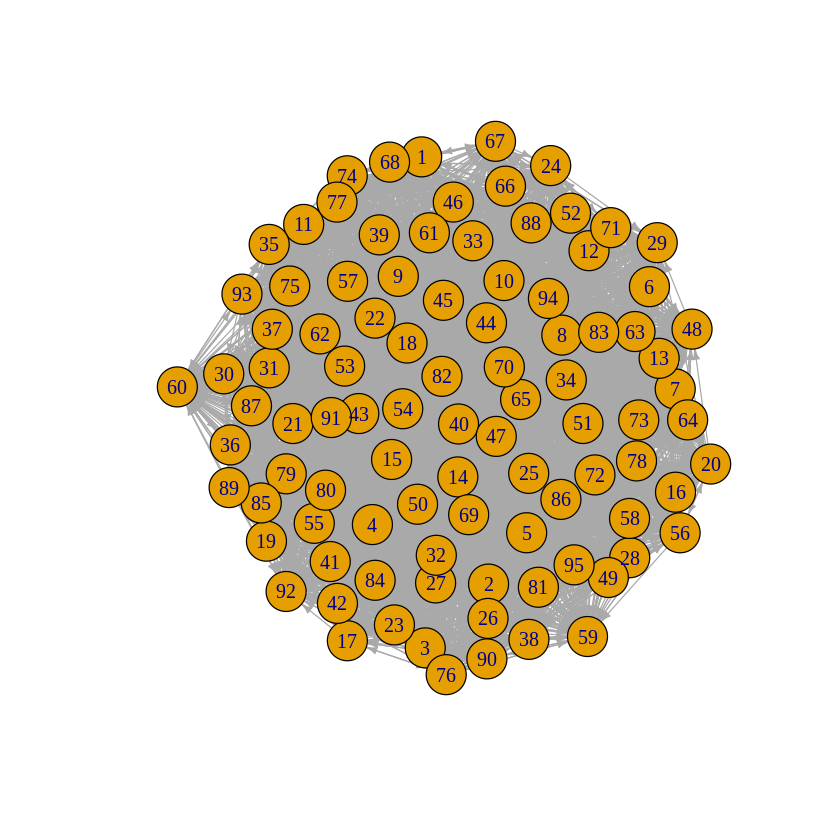

In [7]:
plot(random_graph, layout = layout_with_fr, vertex.label = V(random_graph)$name, edge.arrow.size=0.4)

3) Вычислить «пятичисловую сводку» для графа G𝑑.

In [8]:
cat("size: ", network.size(net))
cat("\ndensity: ", gden(net))
cat("\n#components: ", components(net))
cat("\ndiameter: ", diameter(random_graph))
cat("\ngtrans: ", gtrans(net, mode = "graph"))

size:  95
density:  0.6340426
#components:  1
diameter:  2
gtrans:  0.6349159

4) Вычислить цензус диад. Сделать выводы.

In [9]:
census <- dyad_census(random_graph)
census

$mut
[1] 1778

$asym
[1] 2106

$null
[1] 581

Выводы:

Взаимных диад 1778

Однонаправленных отношений 2106

Несвязных акторов 581

5) Вычислить оценку индекса взаимности Каца—Пауэла при фиксированом выборе акторов 𝑑 и при свободном выборе. Сделать выводы.

Возьмём d = 50.

Оценка при фиксированном выборе по методу моментов:

In [10]:
d <- 50
KPEstimationFixed = (2*(g-1) * census$mut - g*d*d) / (g*d*(g-1-d))
cat("Estimation with fixed d:", KPEstimationFixed)

Estimation with fixed d: 0.4629856

Оценка при свободном выборе:

In [11]:
adj_matrix <- as_adjacency_matrix(random_graph)
matr <- as.matrix(adj_matrix)
L_list <- rowSums(matr)
L <- sum(L_list)
L2_list <- rep(0, nrow(matr))
for(row in 1:nrow(matr))
  L2_list[row] <- L_list[row]*L_list[row]

L2 <- sum(L2_list)
KPEstimationFree <- (2 * (g - 1) * (g - 1) * census$mut - L * L + L2) / (L * (g-1)* (g-1) - L*L + L2)
cat("Estimation free:", KPEstimationFree)

Estimation free: -0.01625784

Выводы: Оценка при свободном выборе получилась около -0.01, а при фиксированном и равном 50 примерно 0.46, разница на порядок.

6) Вычислить вероятность того, что связь будет взаимной для каждого случая.

Фиксированный

In [12]:

p_fixed <- (d / (g-1)) * ((d/(g-1)) + KPEstimationFixed*(g - 1 - d) / (g - 1))
p_fixed

[1] 0.3982083

Свободный

In [13]:
p_free = 0
for(row in 1:(nrow(matr) - 1))
  for(row2 in (row + 1):nrow(matr))
    p_free <- p_free + (L_list[row] * L_list[row2])/((g-1)*(g-1))
p_free = p_free * 2 / (g*(g-1))
p_free

[1] 0.4019811

Несмотря на большую разницу в оценках, итоговые вероятность получились почти одинаковыми, около 40%.

7) Вычислить индекс взаимности Бандиопадхьяйя. Сделать выводы.

In [14]:
f <- function(t) {
  return (sum(L_list[1:t]) - t * (g - 1) - (factorial(t)/(factorial(2) * factorial(t-2))))
}

g_func <- function(t) {
  res_sum <- 0
  for(i in (t + 1):g)
    res_sum <- res_sum + min(t, L_list[i])
  return (sum(L_list[1:t]) - t* (t-1) - res_sum)
}

f_res = rep(2, g)
for(t in 2:g)
  f_res[t] = f(t)
  
g_res = rep(2, g - 1)
for(t in 2:(g - 1))
  g_res[t] = g_func(t)
  
Mmin <- max(f_res)
Mmax <- floor(0.5 * (L - max(g_res)))

index_B <- (census$mut - Mmin) / (Mmax - Mmin)

index_B


[1] 0.6280057

Индекс получился около 0.63, то есть количество взаимных диад примерно 2/3 от их максимально возможного количества.

8) Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе
G𝑑 имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔 − 1), 1/2) при
уровне значимости 𝛼. Определить максимальный уровень значимости при котором нулевая гипотеза не отвергается.

𝛼 = 0.05


In [15]:
binom.test(floor(L), g*(g-1), 0.5)


	Exact binomial test

data:  floor(L) and g * (g - 1)
number of successes = 5662, number of trials = 8930, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
95 percent confidence interval:
 0.6239534 0.6440442
sample estimates:
probability of success 
             0.6340426 


p-value < 𝛼 => отклоняем гипотезу. Максимальный уровень значимости должен быть меньше p-value, следовательно не больше, чем 2.2е-16

9)  Проверить нулевую гипотезу о том, что число дуг 𝐿 в орграфе G𝑑
имеет биномиальное распределение 𝐿 ∼ Bin(𝑔(𝑔−1), 𝑃0) при уровне
значимости 𝛼. Определить максимальный уровень значимости при
котором нулевая гипотеза не отвергается. 

$P_0$ = 0.72, 𝛼 = 0.05

In [16]:
p0 = 0.72
binom.test(floor(L), g*(g-1), p0)


	Exact binomial test

data:  floor(L) and g * (g - 1)
number of successes = 5662, number of trials = 8930, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.72
95 percent confidence interval:
 0.6239534 0.6440442
sample estimates:
probability of success 
             0.6340426 


p-value < 𝛼 => отвергаем гипотезу. Максимальный уровень значимости должен быть меньше p-value, следовательно не больше, чем 2.2е-16

10) Построить доверительный интервал для оценки параметра 𝑝 с доверительной надёжностью (1 − 𝛼). Сделать выводы

In [17]:
p_Estimation <- L / (g*(g-1))
laplasZAlpha = 0.5 - 0.95/2
laplasZAlpha

[1] 0.025

Посмотрим в таблице, $Z_a/2$ = 	0.06

In [18]:
ZAlpha <- 0.06
plower <- p_Estimation - ZAlpha*sqrt(p_Estimation * (1 - p_Estimation) / (g*(g-1)))
pupper <- p_Estimation + ZAlpha*sqrt(p_Estimation * (1 - p_Estimation) / (g*(g-1)))

plower
pupper


[1] 0.6337367

[1] 0.6343484

Доверительный интервал получается следующий: 0.6337 $\leqslant$ $p_e$ $\leqslant$ 0.6343 То есть с вероятность в 95% p лежит в этом промежутке, что, если учесть погрешность, соответствует действительности.

## Выводы

В результате работы был проанализирован случайно сгенерированный граф с данными параметрами: $ p = 0.63, g = 95$. В ходе работы были расчитаны индексы Каца-Пауэлла и Бандиопадхьяйя, расчитаны их оценки и вероятности. А в конце работы была получена оценка значения p, которая соответствовала действительности 